# Jurnal Modul 3

In [109]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Nomor 1 
MELAKUKAN DEKOMPOSISI CITRA

In [110]:
image = cv.imread("IoriYagami.jpg", cv.IMREAD_GRAYSCALE)

lpf = np.array([0.7, 0.7])
hpf = np.array([-0.7, 0.7])

membaca gambar "IoriYagami.jpg" dalam mode skala abu-abu menggunakan OpenCV dan menyimpannya dalam variabel image. Kedua, mendefinisikan filter low-pass (LPF) dan high-pass (HPF) dengan masing-masing koefisien [0.7, 0.7] dan [-0.7, 0.7] dalam bentuk array numpy.

In [111]:
def row_padding (img, n):
    n = len(n)-1
    result = np.pad (img, ([0,0],[0,n]))
    return result

def column_padding (img, n):
    n = len(n)-1
    result = np.pad (img, ([0,n],[0,0]))
    return result

In [112]:
def row_convolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(len(kernel)):
                result[i][j] += (kernel[k]*pad[i,j+k])
    return result

def column_convolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(len(kernel)):
                result[i][j] += (kernel[k]*pad[i+k,j])
    return result

In [113]:
def row_DownSampling(array):
    baris    = int(array.shape[0]/2)
    kolom = int(array.shape[1])
    result = np.zeros((baris,kolom))
    index = 0
    for i in range (baris): 
        for j in range (kolom):
            result[i][j]=array[index][j]
        index+=2
    return result

def column_DownSampling(array):
    baris    = int(array.shape[0])
    kolom = int(array.shape[1]/2) 
    result = np.zeros((baris,kolom))
    for i in range (baris): 
        index = 0
        for j in range(kolom): 
            result[i][j] = array[i][index]
            index+=2
    return result

In [114]:
def dekomposisi (citra, f1, f2):
    Pad1 = row_padding (citra, f1) 
    Konvolusi1 = row_convolution(Pad1, f1, citra) 
    DownSampling1 = column_DownSampling (Konvolusi1)
    Pad2 = column_padding (DownSampling1, f2)
    Konvolusi2 = column_convolution(Pad2,f2, DownSampling1) 
    DownSampling2 = row_DownSampling (Konvolusi2) 
    Result = DownSampling2
    return Result

In [115]:
w1 = dekomposisi(image, lpf, lpf)
x1 = dekomposisi(image, lpf, hpf)
y1 = dekomposisi(image, hpf, lpf)
z1 = dekomposisi(image, hpf, hpf)

In [116]:
def Display1 (LL, LH, HL, HH):
    baris_1 = np.concatenate ((LL, HL), axis = 1)
    baris_2 = np.concatenate ((LH, HH), axis = 1)

    Result  = np.concatenate ((baris_1, baris_2), axis=0)
    return Result

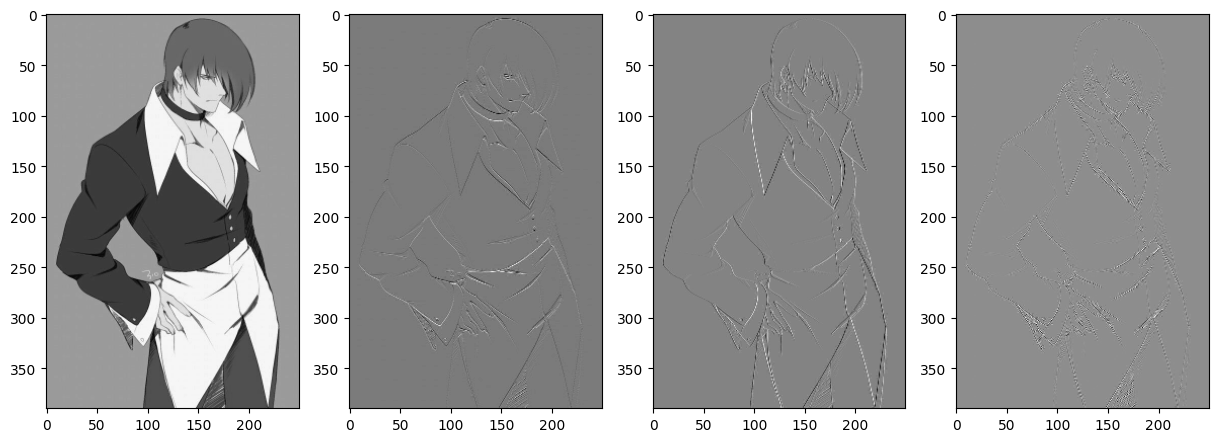

In [117]:
def Display(w1,x1,y1,z1):
   plt.figure(figsize=(15,15))
   plt.subplot(1,4,1)
   plt.imshow(w1, cmap='gray')
   plt.subplot(1,4,2)
   plt.imshow(x1, cmap='gray')
   plt.subplot(1,4,3)
   plt.imshow(y1, cmap='gray')
   plt.subplot(1,4,4)
   plt.imshow(z1, cmap='gray')
   plt.show()

Display(w1, x1, y1, z1)

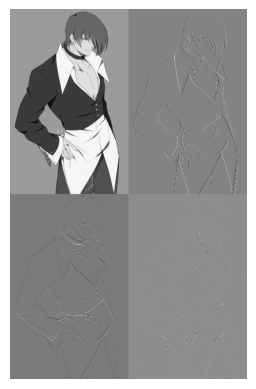

In [118]:
def gabung(w1, x1, y1, z1):
    w1_norm = (w1 - np.min(w1)) / (np.max(w1) - np.min(w1))
    x1_norm = (x1 - np.min(x1)) / (np.max(x1) - np.min(x1))
    y1_norm = (y1 - np.min(y1)) / (np.max(y1) - np.min(y1))
    z1_norm = (z1 - np.min(z1)) / (np.max(z1) - np.min(z1))

    gabungan = Display1(w1_norm, x1_norm, y1_norm, z1_norm)
    plt.imshow(gabungan, cmap='gray')
    plt.axis('off')  
    plt.show()
kont = gabung(w1, x1, y1, z1)

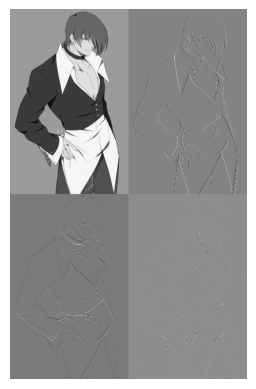

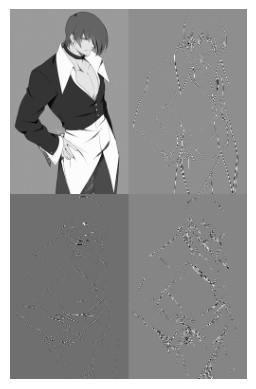

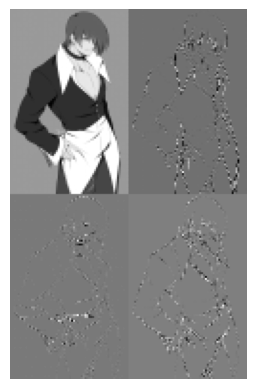

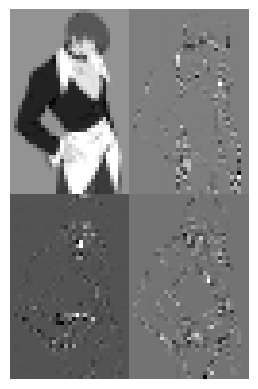

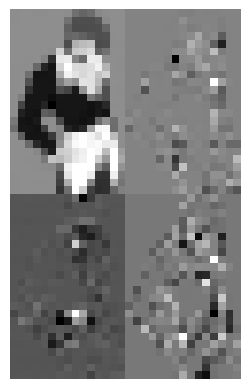

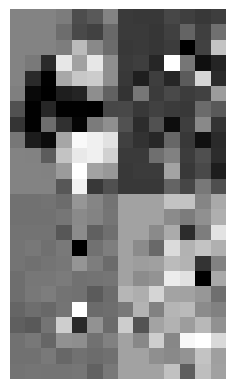

In [119]:
def gabung(w1, x1, y1, z1):
    w1_norm = (w1 - np.min(w1)) / (np.max(w1) - np.min(w1))
    x1_norm = (x1 - np.min(x1)) / (np.max(x1) - np.min(x1))
    y1_norm = (y1 - np.min(y1)) / (np.max(y1) - np.min(y1))
    z1_norm = (z1 - np.min(z1)) / (np.max(z1) - np.min(z1))

    gabungan = Display1(w1_norm, x1_norm, y1_norm, z1_norm)
    plt.imshow(gabungan, cmap='gray')
    plt.axis('off')
    plt.show()

kont = gabung(w1, x1, y1, z1)

w2 = dekomposisi(w1, lpf, lpf)
x2 = dekomposisi(x1, lpf, hpf)
y2 = dekomposisi(y1, hpf, lpf)
z2 = dekomposisi(z1, hpf, hpf)

image1 = gabung(w2, x2, y2, z2)

w3 = dekomposisi(w2, lpf, lpf)
x3 = dekomposisi(x2, lpf, hpf)
y3 = dekomposisi(y2, hpf, lpf)
z3 = dekomposisi(z2, hpf, hpf)

image2 = gabung(w3, x3, y3, z3)

w4 = dekomposisi(w3, lpf, lpf)
x4 = dekomposisi(x3, lpf, hpf)
y4 = dekomposisi(y3, hpf, lpf)
z4 = dekomposisi(z3, hpf, hpf)

image3 = gabung(w4, x4, y4, z4)

w5 = dekomposisi(w4, lpf, lpf)
x5 = dekomposisi(x4, lpf, hpf)
y5 = dekomposisi(y4, hpf, lpf)
z5 = dekomposisi(z4, hpf, hpf)

image4 = gabung(w5, x5, y5, z5)

w6 = dekomposisi(w5, lpf, lpf)
x6 = dekomposisi(x5, lpf, hpf)
y6 = dekomposisi(y5, hpf, lpf)
z6 = dekomposisi(z5, hpf, hpf)

image5 = gabung(w6,x6,y6,z6)

# Nomor 2 
Melakukan rekonstruksi dari hasil dekomposisi  

In [120]:
def rekonstruksi(LL, LH, HL, HH):
    tinggi_img, lebar_img = LL.shape 
    t = tinggi_img * 2
    l = lebar_img * 2 
    image = np.zeros([t, l]) 
    LL2, LH2 = np.zeros([t, l]), np.zeros([t, l]) 
    HL2, HH2 = np.zeros([t, l]), np.zeros([t, l]) 
    
    for i in range(t // 2):
        for j in range(l // 2):
            LL2[2*i][2*j] = LL[i][j]
            LH2[2*i][2*j] = LH[i][j]
            HL2[2*i][2*j] = HL[i][j]
            HH2[2*i][2*j] = HH[i][j]
    
    for i in range(1, t, 2):
        for j in range(l):
            LL2[i][j] = LL2[i-1][j] + LH2[i-1][j]
    
    for i in range(t):
        for j in range(1, l, 2):
            LL2[i][j] = LL2[i][j-1] + HL2[i][j-1]
    
    for i in range(t):
        for j in range(l):
            image[i][j] = LL2[i][j] + HH2[i][j]
    
    return image

panjang :  780 lebar :  500


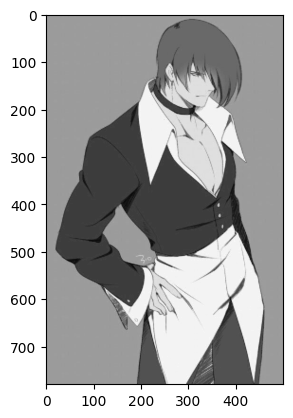

In [121]:
imgfix1 = rekonstruksi(w1,x1,y1,z1)
panjang, lebar = imgfix1.shape
plt.imshow(imgfix1, cmap="gray")
print("panjang : ", panjang, "lebar : ", lebar)

In [122]:
imgfix2 = rekonstruksi(w2,x2,y2,z2)
imgfix3 = rekonstruksi(w3,x3,y3,z3)
imgfix4 = rekonstruksi(w4,x4,y4,z4)
imgfix5 = rekonstruksi(w5,x5,y5,z5)

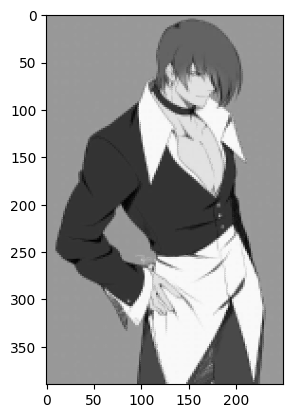

In [123]:
imagefixed2 = rekonstruksi(w2,x2,y2,z2)
plt.imshow(imagefixed2, cmap="gray")

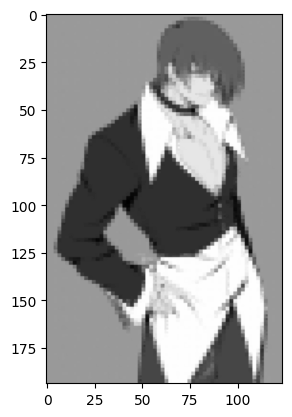

In [124]:
imagefixed3 = rekonstruksi(w3,x3,y3,z3)
plt.imshow(imagefixed3, cmap="gray")

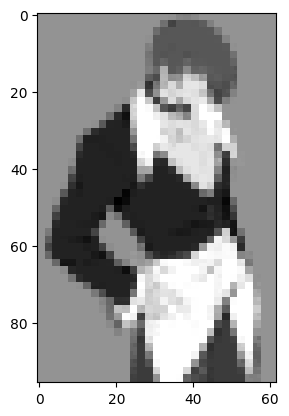

In [125]:
imagefixed4 = rekonstruksi(w4,x4,y4,z4)
plt.imshow(imagefixed4, cmap="gray")

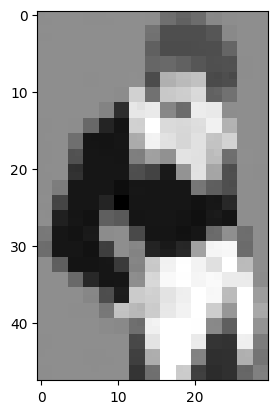

In [126]:
imagefixed5 = rekonstruksi(w5,x5,y5,z5)
plt.imshow(imagefixed5, cmap="gray")

panjang :  24 lebar :  14


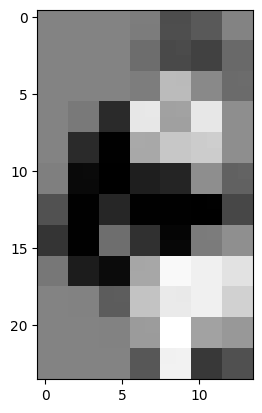

In [127]:
imagefixed6 = rekonstruksi(w6,x6,y6,z6)
panjang, lebar = imagefixed6.shape
plt.imshow(imagefixed6, cmap="gray")
print("panjang : ", panjang, "lebar : ", lebar)

<h1> Nomor 3 </h1>
melakukan dekomposisi citra hingga ke bentuk citra yang diingikan

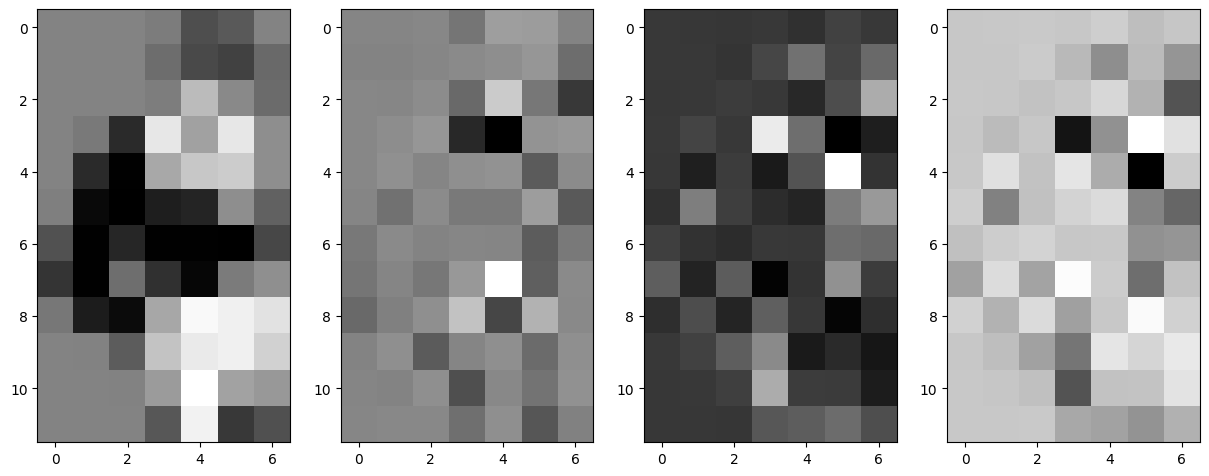

In [128]:
wakhir = dekomposisi(imagefixed6, lpf, lpf)
xakhir = dekomposisi(imagefixed6, lpf, hpf)
yakhir = dekomposisi(imagefixed6, hpf, lpf)
zakhir = dekomposisi(imagefixed6, hpf, hpf)

Display(wakhir,xakhir,yakhir,zakhir)

<h3>hasil dari dekomposisi pada soal merupakan hasil dekomposisi pada level 6 <h3>
dikarenakan pengurangan resolusi gambar dengan downsampling yang secara terus menerus membagi 2 ukuran image, sehingga dari awal mula image berukuran 780x500 menjadi berukuran 24x14 